# Housing price predictions

Data source: https://www.kaggle.com/datasets/camnugent/california-housing-prices/

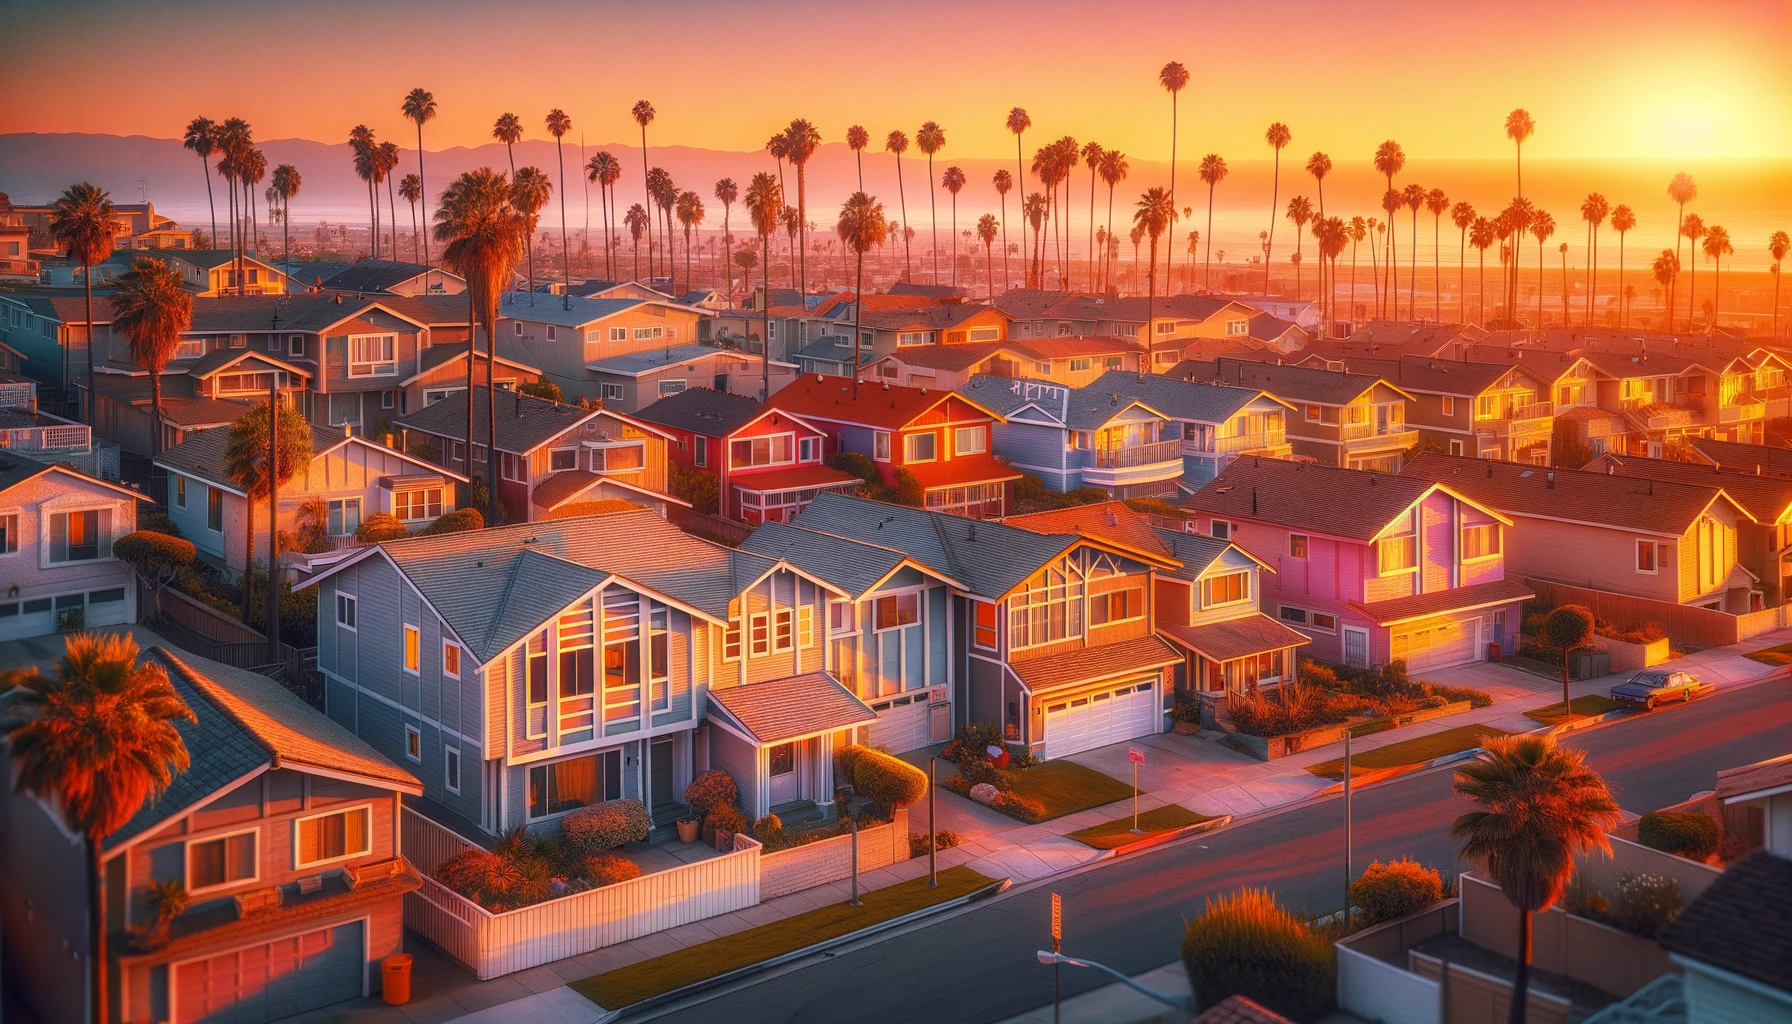

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from the .csv file
# housing = ...
# ---Start of the code---

# ---End of the code---

In [ ]:
len_orig = housing.shape[0]
print(f'Number of examples in the dataset: {len_orig}')
print(f'Number of features in the dataset: {housing.shape[1]}')
print(f'---------------------------------------')

In [ ]:
# find information about the dataset
# ---Start of the code---

# ---End of the code---

## Numerical attribute analysis

In [ ]:
# analyze numerical attributes
# ---Start of the code---

# ---End of the code---

In [ ]:
# plot histograms of numerical values
# ---Start of the code---

# ---End of the code---

## Categorical value analysis

In [ ]:
# Count unique value for each category
# ---Start of the code---

# ---End of the code---

# Exploratory Data Analysis

In [ ]:
# Print number of missing values for each column
# ---Start of the code---

# ---End of the code---

In [ ]:
# Process missing data
def drop_missing(DataFrame, threshold_val = 0.05):
    threshold = len(DataFrame) * threshold_val
    cols_to_drop = DataFrame.columns[DataFrame.isna().sum() <= threshold]
    DataFrame.dropna(subset=cols_to_drop, inplace=True)
    return None

In [ ]:
# Apply the drop_missing function to housing DataFrame
# ---Start of the code---

# ---End of the code---

In [ ]:
# Remove capped values
# ---Start of the code---

# ---End of the code---

The code block below checks the amount of data we still have after our Data Preparation steps

In [ ]:
len_eda = housing.shape[0]

print(f'Number of examples in the dataset: {len_eda}')
print(f'Percentage of the original dataset: {(100 * len_eda / len_orig):.2f}%')
print(f'---------------------------------------')

housing.info()

In [ ]:
# plot histograms of numerical values after NaN and capped values handling
# ---Start of the code---

# ---End of the code---

## Data preprocessing

In [ ]:
# Create an income category for stratification
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

# Prepare training and testing datasets
# ---Start of the code---

# ---End of the code---
# Remove the column used for stratification
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)


strat_train_set.to_csv('datasets/train_set.csv')
strat_test_set.to_csv('datasets/test_set.csv')

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.info()

## Correlation coefficient analysis

In [ ]:
# Show a correlation matrix for the data. Use DataFrame.corr() method and sns.heatmap to plot it.
# ---Start of the code---

# ---End of the code---

In [ ]:
# Show a pairplot for numerical values. Use a subset of columns to show.

## Preparation for ML

In [ ]:
X_train = strat_train_set.drop("median_house_value", axis=1)
Y_train = strat_train_set["median_house_value"].copy()

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

In [ ]:
# To set visibility of pipelines
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display="diagram")

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder

In [ ]:
log_pipeline = make_pipeline(
    KNNImputer(),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    MinMaxScaler(feature_range=(0, 1)))

In [ ]:
one_hot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder())

In [ ]:
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler(feature_range=(0, 1)))

In [ ]:
preprocessing = ColumnTransformer([
    ("log", log_pipeline, ['total_rooms', 'total_bedrooms', 'population', 'households']),
    ("one_hot", one_hot_pipeline, ["ocean_proximity"]),
],
remainder=default_num_pipeline
)

preprocessing

In [ ]:
X_train_array = preprocessing.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_array, columns=preprocessing.get_feature_names_out(), index=X_train.index)
X_train_df.head()

In [ ]:
X_train_df.hist(figsize=(12,8), bins=20)
plt.show()

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a pipeline with:
#- preprocessing pipeline  
#- LinearRegression()  
# use 
# lin_reg = make_pipeline( , )
# ---Start of the code---

# ---End of the code---

# Train your model
# ---Start of the code---

# ---End of the code---

In [ ]:
Yhat_train = lin_reg.predict(X_train)
print(Yhat_train[:5].round(-2))
print(Y_train.iloc[:5].values)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(Y_train, Yhat_train, 
                              squared=False)

lin_rmse

In [ ]:
# Implement cross-validation for model evaluation
# use cross_val_score(model, x, y, cv=5).mean()
# ---Start of the code---

# ---End of the code---